# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

In [173]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [174]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### Understanding the structure of the data

In [175]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [177]:
# Write your code here
df.shape

(1898, 9)

#### **Observations**:
  *There are 1898 records (rows) and 9 columns present in the data.*

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [178]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


####**Observations**:
*The datatypres in the data set are: float, int and object*



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [179]:
data_new=pd.read_csv('/content/drive/MyDrive/foodhub_order.csv', na_values=['Not given','inf'])
data_new.isna().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observations:
The onlye 'missing' values are the orders that were not provided a rating. But we don't have anything that's empty.

If we check the data for inf, it will say there are 0.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [180]:
# Write your code here
df.describe(include='all')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


#### Observations:


*   Minimum amount of time for food to be prepared is 20 minutes
*   Average amount of time for food to be prepared is 27.37 minutes
*   Maximum amount of item for food to be prepares is 35 minutes





### **Question 5:** How many orders are not rated? [1 mark]

In [181]:
# Write a for loop to count the not given and the NaN values.

not_given_count=0
nan_count = 0

for rate in df['rating']:
    if rate == 'Not given':
        not_given_count += 1
    if pd.isna(rate):
        nan_count += 1


print('Number of Not Given values:', not_given_count)
print("Number of NaN values:", nan_count)




Number of Not Given values: 736
Number of NaN values: 0


#### Observations:
The orders that are not rated are: 736
 and there are no orders with Nan values.

### Exploratory Data Analysis (EDA)

### **Question 6 Univariate Analysis:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

####**a.Univariate Analysis of Order Id**

In [182]:
df['order_id'].nunique()

1898

Observations:
*   There are 1898 records of different purchase orders for FoodHub

####**b.Univariate Analysis of Customer Id**

In [183]:
print('How many different Customer_ids does the data set have?')
print(df['customer_id'].nunique())
print('\n')
print('Frequency of Customer_id Purchasing')

print(df['customer_id'].value_counts())



How many different Customer_ids does the data set have?
1200


Frequency of Customer_id Purchasing
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64


Observations:
*   There are 1200 records of different Customers for FoodHub
*   So we have at least one third of our customers placing at least 2 orders.

####**c.Univariate Analysis of Restaurant Name**

In [184]:
print('Amount of Different Restaurants:')
print(df['restaurant_name'].nunique())# this prints how many different restaurants are in the data set. (178)

#plt.figure(figsize=(50,50))
#plt.title("Restaurant Order Frequency")
#sns.countplot(data=df, y = 'restaurant_name', color='pink')
#plt.xlabel('Frequency')
#plt.ylabel('Restaurant Name')
#plt.show()
print('-'*50)

print('Stats for the restaurant_name Column')
df['restaurant_name'].describe()



Amount of Different Restaurants:
178
--------------------------------------------------
Stats for the restaurant_name Column


count            1898
unique            178
top       Shake Shack
freq              219
Name: restaurant_name, dtype: object

Observations:


*   There are 178 Different restaurants in the data set
*   Most popular restaurant is Shake Shack with 219 orders.



####**d.Univariate Analysis of Cuisine Type**

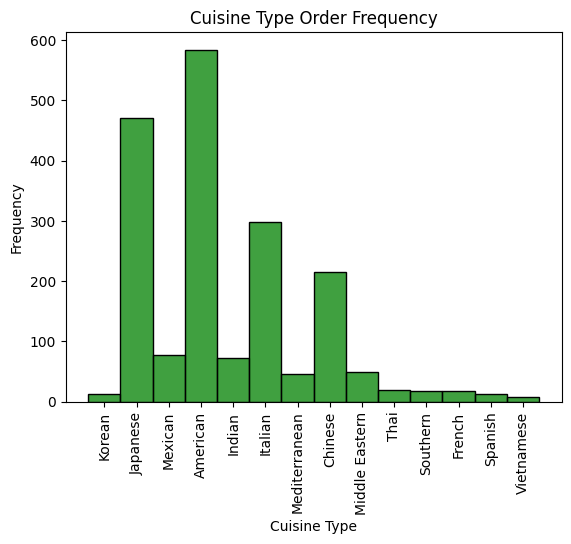



Amount of Unique Cuisines:
14


The top 5 cuisines are:
American    584
Japanese    470
Italian     298
Chinese     215
Mexican      77
Name: cuisine_type, dtype: int64


In [185]:

plt.title("Cuisine Type Order Frequency")
plt.xlabel('Cuisine Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
sns.histplot(data=df, x='cuisine_type', color='green')
plt.show()
print('\n')

print('Amount of Unique Cuisines:')
print(df['cuisine_type'].nunique())
print('\n')
print('The top 5 cuisines are:')
print(df['cuisine_type'].value_counts().head(5))


Observations:

* There are 14 different cuisine types.

* The most ordered cuisines on FoodHub are:
  1.   American
  2.   Japanese
  3.   Italian
  4.   Chinese
  5.   Mexican



####**e.Univariate Analysis of Cost per Order**

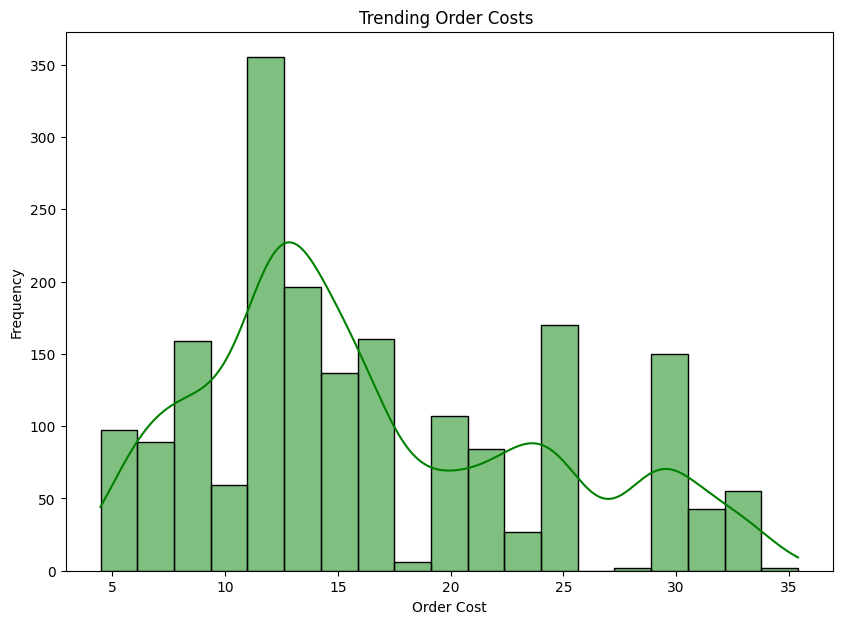

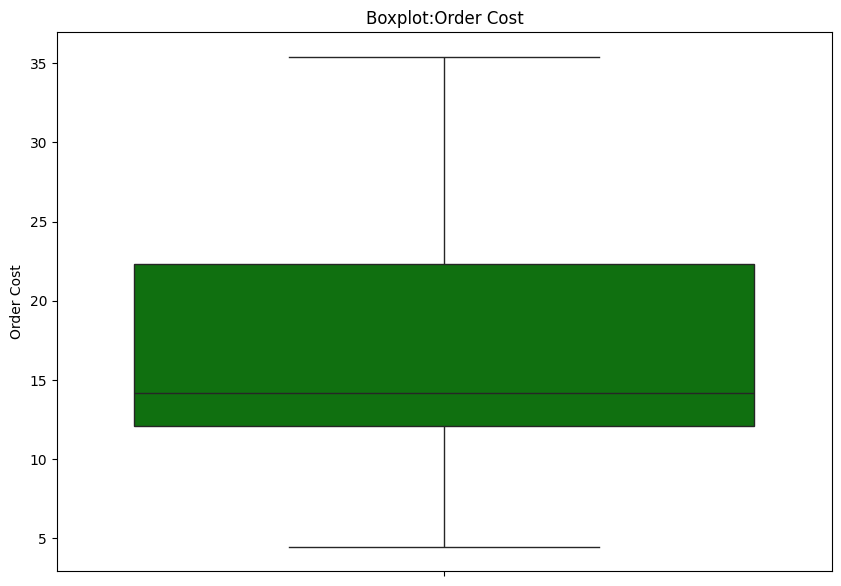



Stats for Cost of the Order Column
--------------------------------------------------


count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

In [186]:
#---------Histogram
plt.figure(figsize=(9.9,7))
plt.title("Trending Order Costs ")
plt.xlabel('Order Cost')
plt.ylabel('Frequency')
sns.histplot(data=df, x='cost_of_the_order', color='green', kde=True)
plt.show()

print('\n')
#----------Boxplot
plt.figure(figsize=(10,7))
plt.title('Boxplot:Order Cost')
plt.ylabel('Order Cost')
sns.boxplot(data = df, y='cost_of_the_order', color='green')
plt.show()

print('\n')
print('Stats for Cost of the Order Column')
print('-'*50)
df['cost_of_the_order'].describe()



Observations:


*   We don't have any outliers with the box plot.
*   We have a right-skewed distributions.
*   The average of the orders placed is $16.49.
*   The median of the orders placed is $14.14
*   Given the previous info we can confidently say that most people will be placing orders under $20 when ordering off of Food Hub



####**f.Univariate Analysis Day Of the Week**

Unique Values for Day of the Week
2




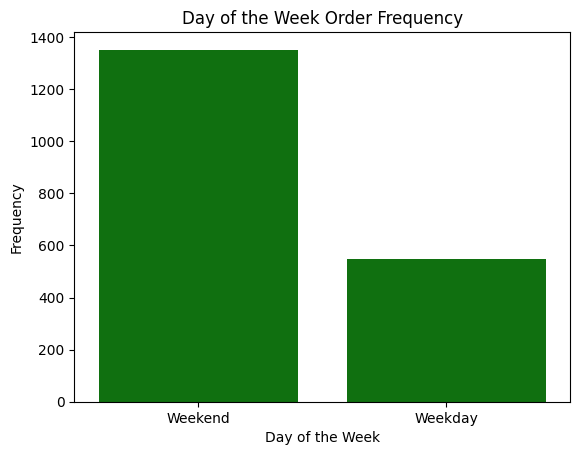

In [187]:
print('Unique Values for Day of the Week')
print(df['day_of_the_week'].nunique())
print('\n')
plt.title("Day of the Week Order Frequency")
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
sns.countplot(data = df, x = 'day_of_the_week', color='green')
plt.show()


Observations:

*    The data set just has it categorized in weekday or weekend, but we can still understand from the graph above that most customers order on the weekend.

####**g.Univariate Analysis of Rating**

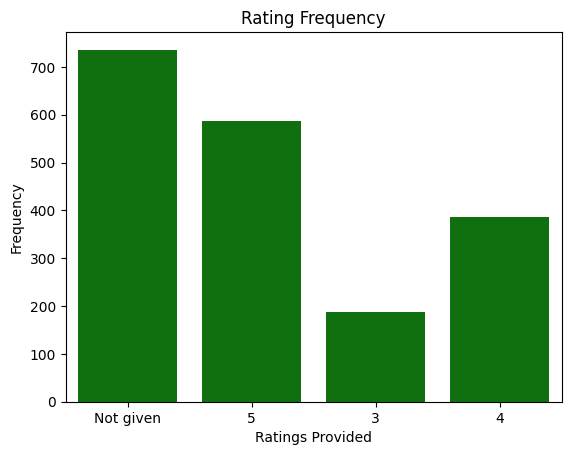



Ratings available in the data set:
4


Stats for Rating Column
--------------------------------------------------


count          1898
unique            4
top       Not given
freq            736
Name: rating, dtype: object

In [188]:

plt.title("Rating Frequency")
plt.xlabel('Ratings Provided')
plt.ylabel('Frequency')
sns.countplot(data = df, x = 'rating', color='green')
plt.show()
print('\n')
print('Ratings available in the data set:')
print(df['rating'].nunique())
print('\n')
print('Stats for Rating Column')
print('-'*50)
df['rating'].describe()


Observations:


*   An overwhelming amount (38.8%) of orders are not placing ratings.
*   However it is good to see that the next highest rating is 5 stars.



####**h.Univariate Analysis of Food Preparation Time**

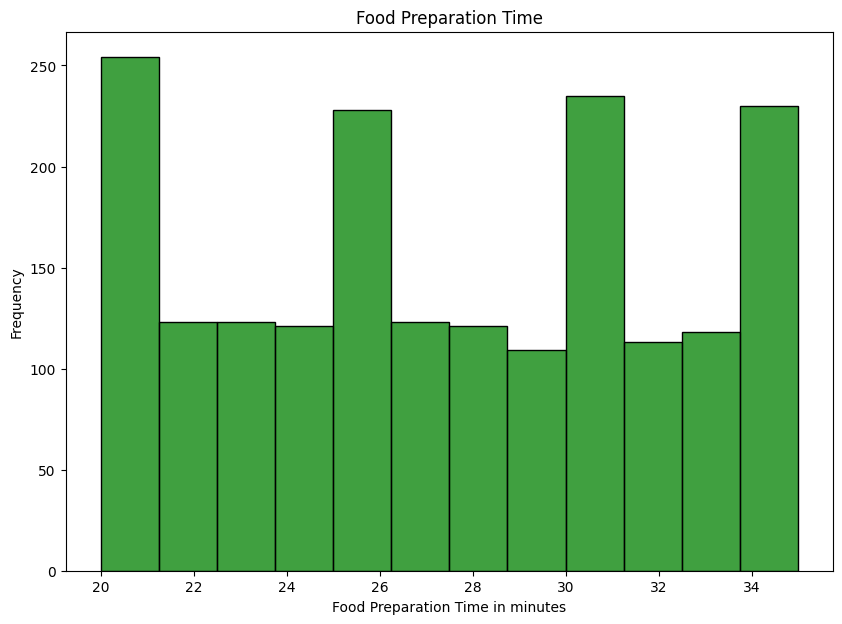

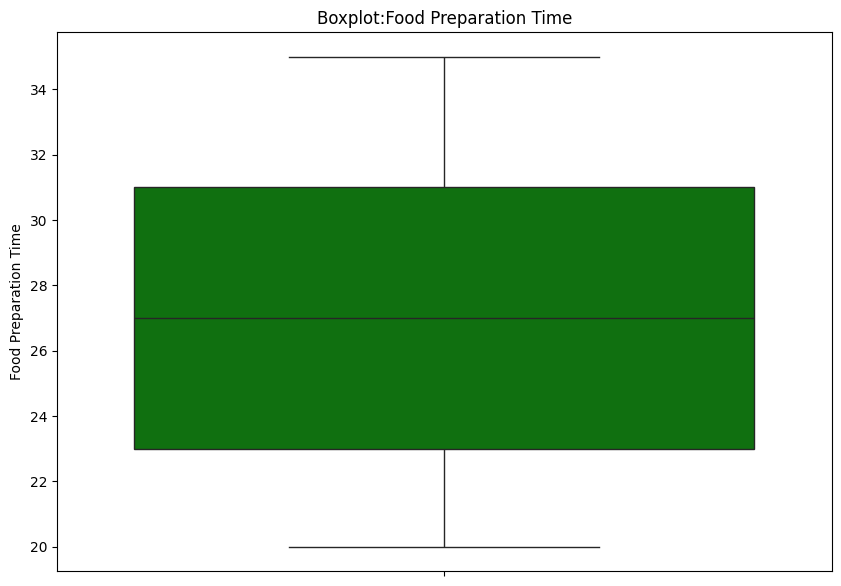

Stats for Food Preparation Time Column
--------------------------------------------------


count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

In [189]:
plt.figure(figsize=(9.9,7))
plt.title("Food Preparation Time")
plt.xlabel('Food Preparation Time in minutes')
plt.ylabel('Frequency')
sns.histplot(data=df, x='food_preparation_time', color='green')
plt.show()

print('\n')
plt.figure(figsize=(10,7))
plt.title('Boxplot:Food Preparation Time')
plt.ylabel('Food Preparation Time')
sns.boxplot(data = df, y='food_preparation_time', color='green')
plt.show()

print('Stats for Food Preparation Time Column')
print('-'*50)
df['food_preparation_time'].describe()





Observations:


*   We see peaks at 20,25,30,35 minutes for food prep so these might be goals the restaurants have for time preperation.
*   Average amount of time for food to be prepared is 27.37 minutes


####**i.Univariate Analysis of Delivery Time**

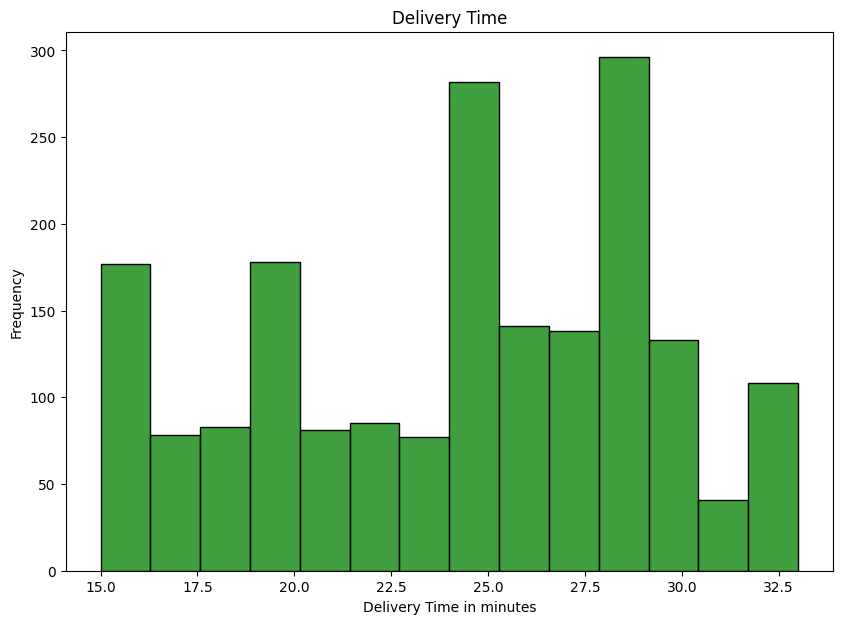

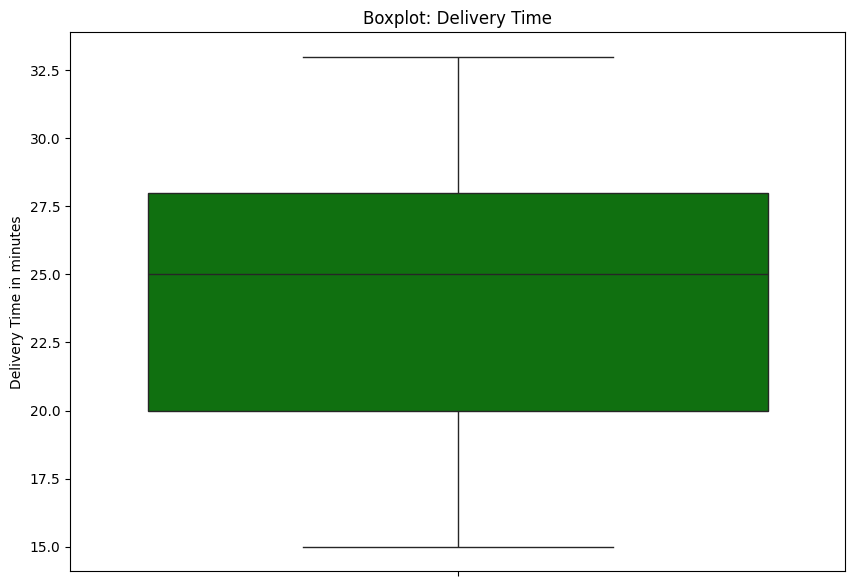

Stats for Food Preparation Time Column
--------------------------------------------------


count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

In [190]:
plt.figure(figsize=(9.9,7))
plt.title("Delivery Time")
#plt.xlim(3000,50000)
#plt.ylim(0,85)
plt.xlabel('Delivery Time in minutes')
plt.ylabel('Frequency')
sns.histplot(data=df, x='delivery_time', color='green')
plt.show()

print('\n')
plt.figure(figsize=(10,7))
plt.title('Boxplot: Delivery Time')
plt.ylabel('Delivery Time in minutes')
sns.boxplot(data = df, y='delivery_time', color='green')
plt.show()

print('Stats for Food Preparation Time Column')
print('-'*50)
df['delivery_time'].describe()


Observations:
*   According to the data 75% of the orders will get delivered under 30 minutes.
*   The average delivery time in 24.16 minutes.
*   The fastest you could possibly expect for an order to arrive is 15 minutes, but considering that the 1st quartile is at 20 minutes, it wouldn't be likely.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [191]:
# Write the code here
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:


The top 5 Restaurants the FoodHub has orderes from are:

1.   Shake Shack (219 orders)
2.   The Meatball Shop (132 orders)
3.   Blue Riggon Sushi (119 orders)
4.   Blue Ribbon Fried Chicken (96 orders)
5.   Parm (68 orders)





### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [192]:
# Write the code here

weekend_orders = df[df['day_of_the_week'] == 'Weekend']
most_pop_cuisine= weekend_orders['cuisine_type'].max() #Used the max function to see what value appeared the most in the column.

print('The most popular cuisine on weekends is '+ most_pop_cuisine +" food.")

The most popular cuisine on weekends is Vietnamese food.


#### Observations:

*   Vietnamese food is the most populat cuisine on the weekend.



### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [193]:
#1. first isolate the orders over 20 dollars
orders_over_20 = df[df['cost_of_the_order']>20]
#2. calculate the percentage of the orders
percentage = (orders_over_20.shape[0] / df.shape[0]) * 100
#3. print it out.
print('The percentage of the orders that cost over $20 is:', round(percentage, 2),'%.')

The percentage of the orders that cost over $20 is: 29.24 %.


#### Observations:
*   29.24% of orders cost over $20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [194]:
# Use the average function.

avg_delivery_time= df['delivery_time'].mean()

# round it off since its a long ass decimal
avg_delivery_time= round(avg_delivery_time,2)

print('The mean order delivery time is', avg_delivery_time, 'minutes.')


The mean order delivery time is 24.16 minutes.


#### Observations:


*   The mean order delivery time is 24.16 minutes.




### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [195]:
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:

The customer Id's with the most purchases are:


1.   52832 with 13 orders
2.   47440 with 10 orders
3.   83287 with 9 orders






### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


####a) Cuisine Type and Cost Analysis

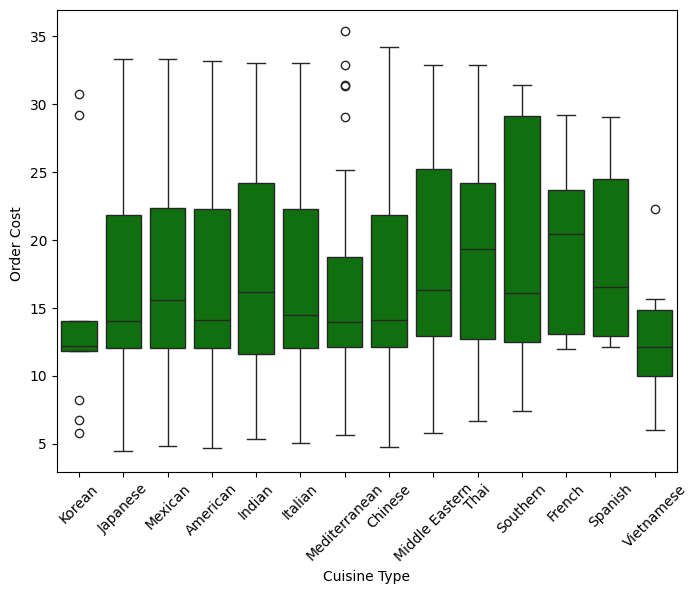

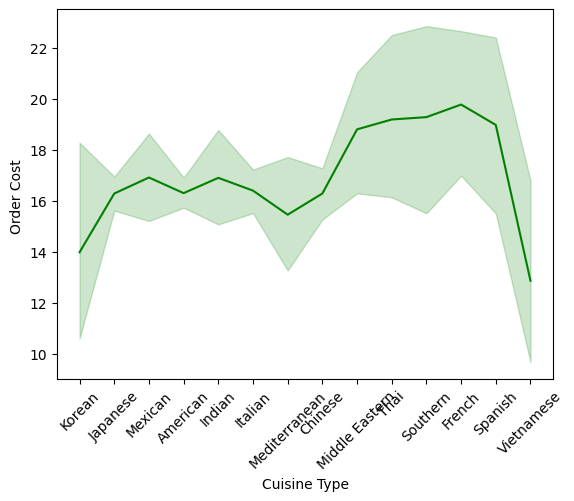

In [196]:
plt.figure(figsize=(8,6 ))
plt.xlabel('Cuisine Type')
plt.ylabel('Order Cost ')
plt.xticks(rotation=45)
sns.boxplot(data =df, x ='cuisine_type', y='cost_of_the_order', color='green')
plt.show()
print('\n')

plt.xlabel('Cuisine Type')
plt.ylabel('Order Cost ')
plt.xticks(rotation=45)
sns.lineplot(data=df, x ='cuisine_type', y = 'cost_of_the_order', color='green');
plt.show()


####b) Cuisine Type and Day of the Week Analysis

<ipython-input-197-aaf777b0730f>:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week',color='green');


<function matplotlib.pyplot.show(close=None, block=None)>

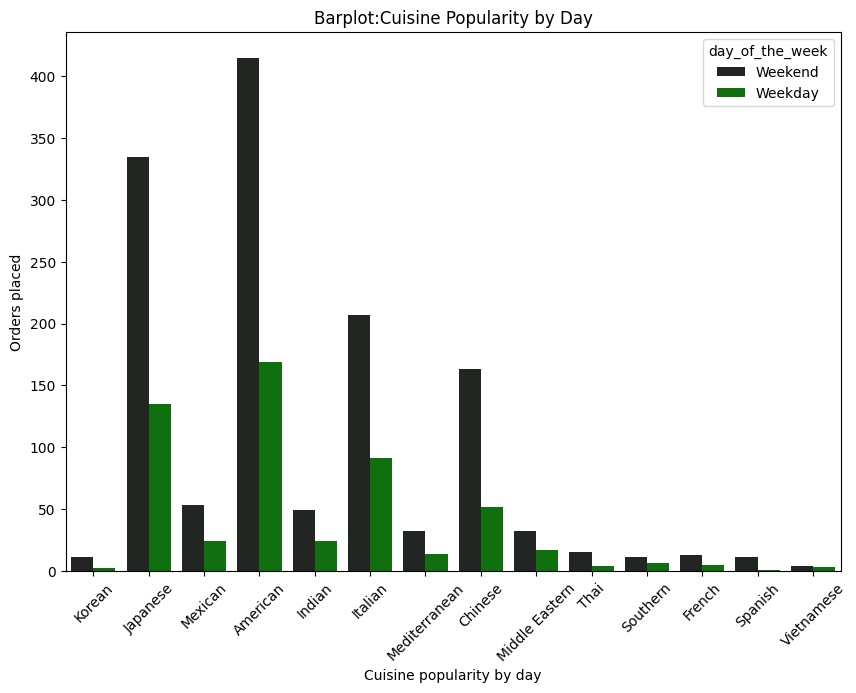

In [197]:
#cuisine type and day of the week
plt.figure(figsize=(10,7)) # makes the plot bigger so that its more readable
plt.title('Barplot:Cuisine Popularity by Day')
plt.ylabel('Orders placed')
plt.xlabel('Cuisine popularity by day')
plt.xticks(rotation=45)
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week',color='green');
(plt.show)


####c)Cuisine Type and Food Preparation Time Analysis

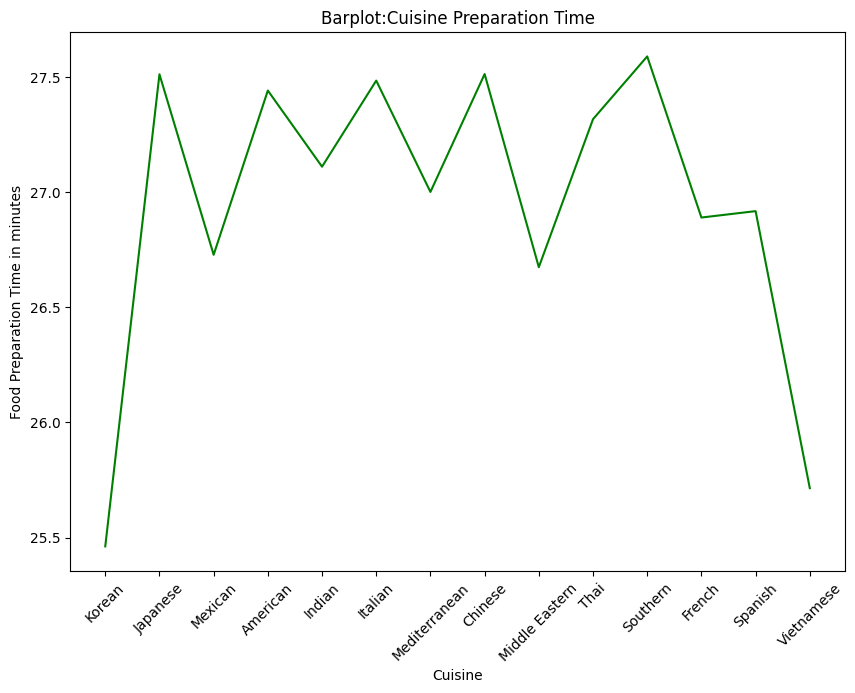

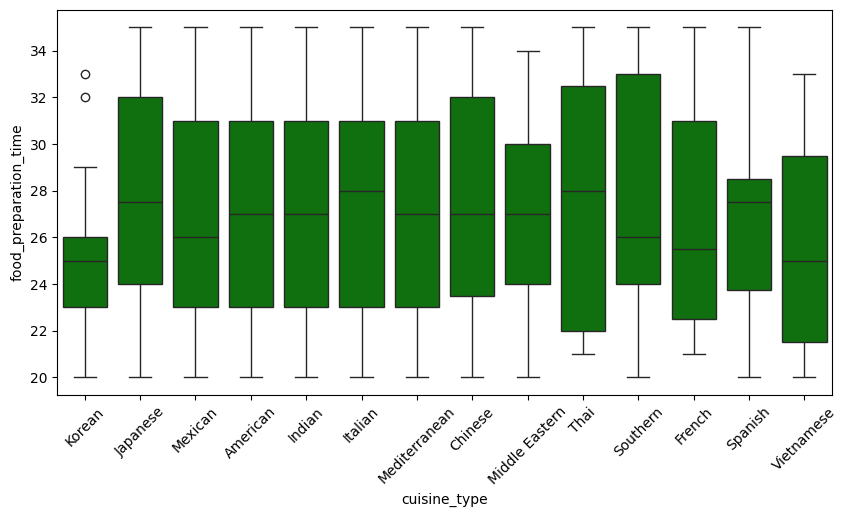

In [198]:
# cuisine type and food preperation time
plt.figure(figsize=(10,7)) # makes the plot bigger so that its more readable
plt.title('Barplot:Cuisine Preparation Time')
plt.ylabel('Food Preparation Time in minutes')
plt.xlabel('Cuisine')
plt.xticks(rotation=45)
sns.lineplot(data=df, x='cuisine_type', y='food_preparation_time' , color='green',errorbar=None)
plt.show()
print('\n')
plt.figure(figsize=(10,5))
sns.boxplot(data= df, x ='cuisine_type', y= 'food_preparation_time', color='green', showfliers=True)
plt.xticks(rotation=45)
plt.show()



####d)Cuisine Type and Delivery Time

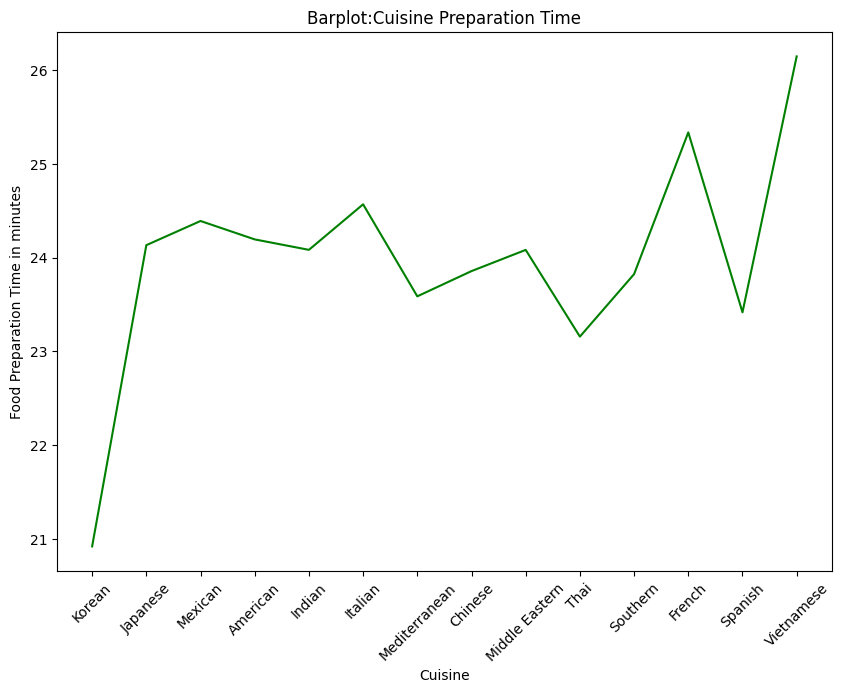

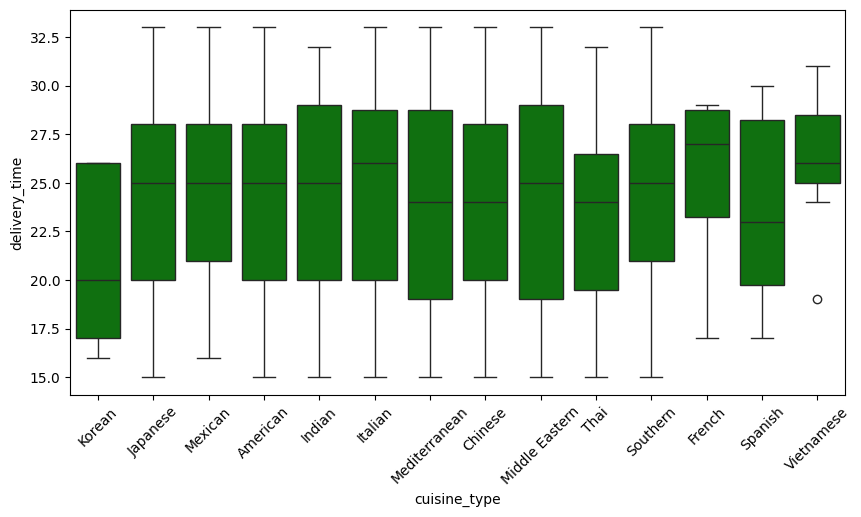

In [199]:
#cuisine type and delivery time


plt.figure(figsize=(10,7)) # makes the plot bigger so that its more readable
plt.title('Barplot:Cuisine Preparation Time')
plt.ylabel('Food Preparation Time in minutes')
plt.xlabel('Cuisine')
plt.xticks(rotation=45)
sns.lineplot(data=df, x='cuisine_type', y='delivery_time' , color='green',errorbar=None)
plt.show()
print('\n')
plt.figure(figsize=(10,5))
sns.boxplot(data= df, x ='cuisine_type', y= 'delivery_time', color='green', showfliers=True)
plt.xticks(rotation=45)
plt.show()



####e)Food Preparation Time and Day of the Week Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

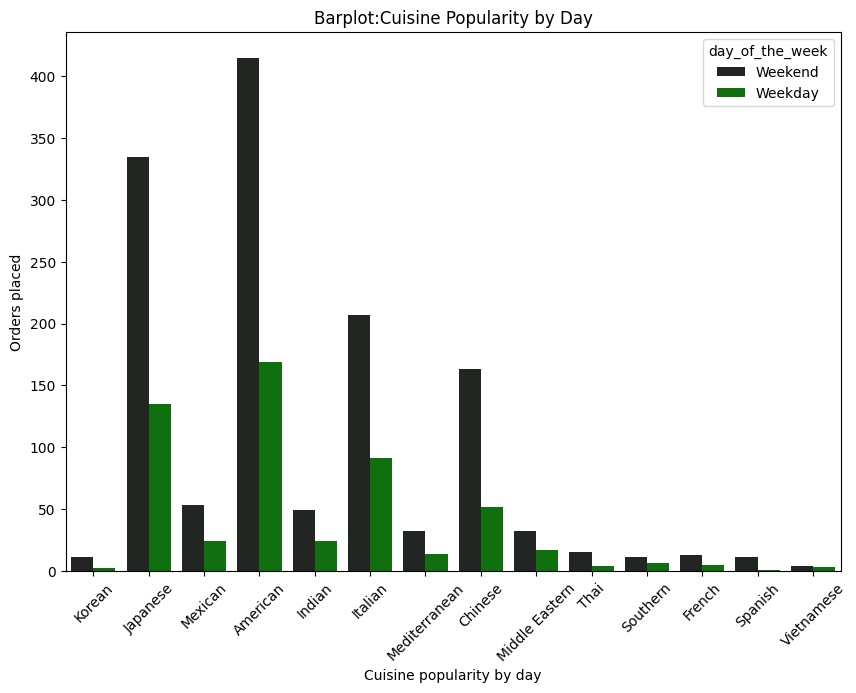

In [200]:
#day of the week and food preparation time


plt.figure(figsize=(10,7)) # makes the plot bigger so that its more readable
plt.title('Barplot:Cuisine Popularity by Day')
plt.ylabel('Orders placed')
plt.xlabel('Cuisine popularity by day')
plt.xticks(rotation=45)
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week', palette='dark:green');
(plt.show)



Observations:
People order way more onthe weekends for most cuisine variations.

####f)Rating and Delivery Time Analysis

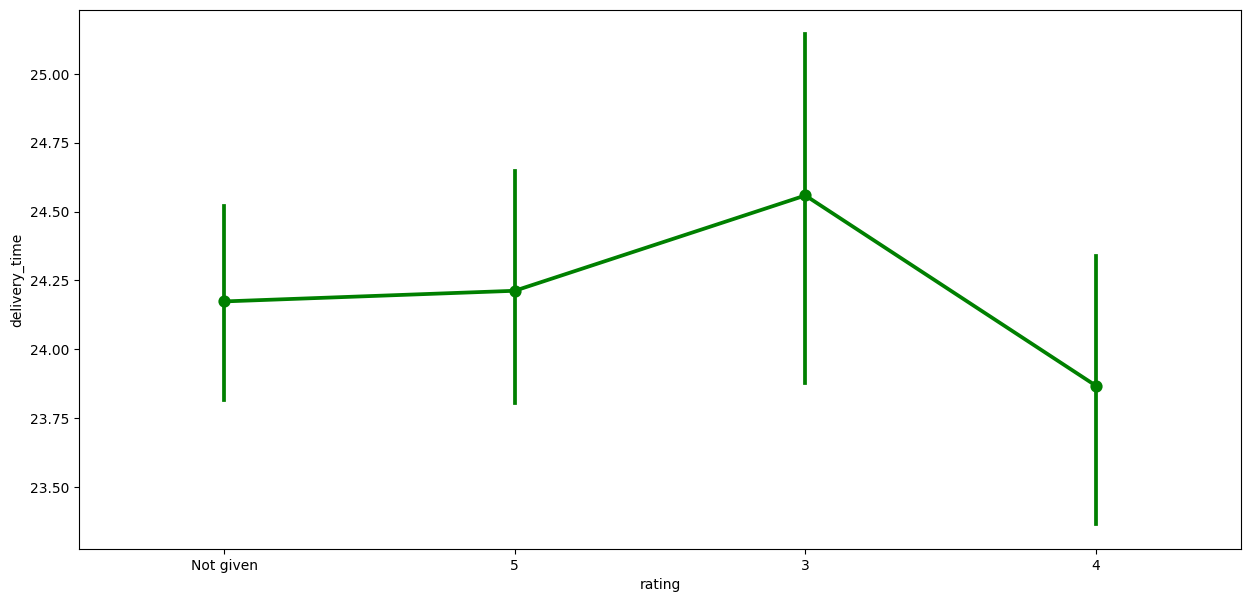

In [201]:
#rating and delivery time

plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df, color='green')
plt.show()

####g)Rating and Food Preparation Time Analysis

/n


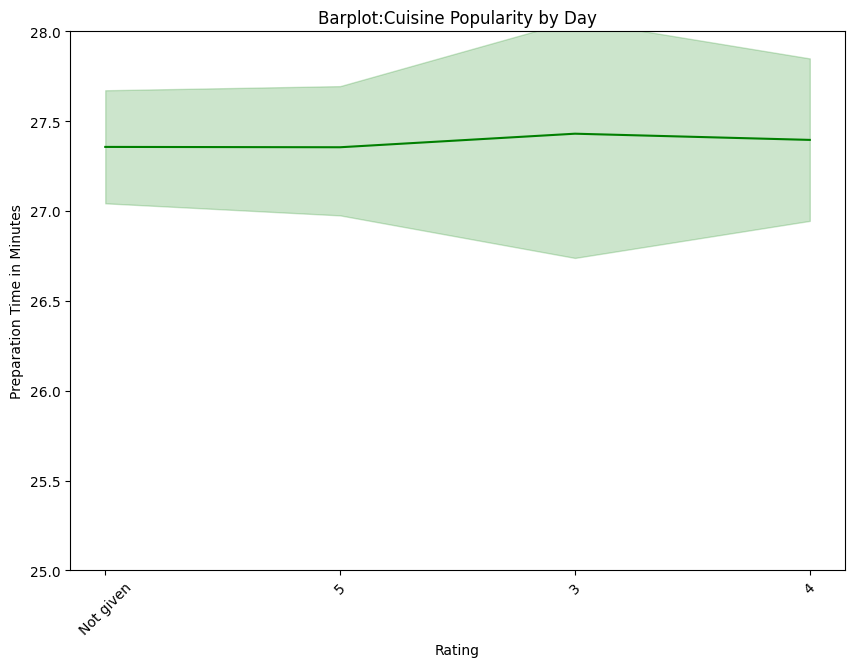

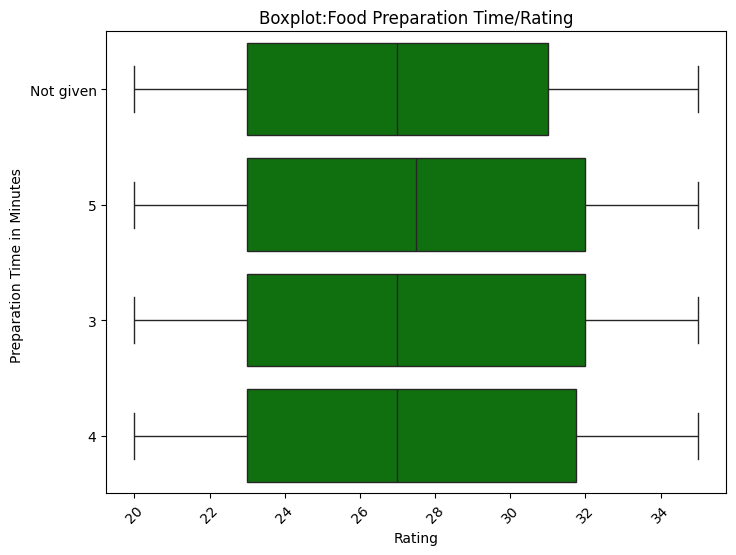

In [202]:
#rating and food preparation time

plt.figure(figsize=(10,7)) # makes the plot bigger so that its more readable
plt.title('Barplot:Cuisine Popularity by Day')
plt.ylabel('Preparation Time in Minutes')
plt.xlabel('Rating')
plt.ylim(25,28)
plt.xticks(rotation=45)

sns.lineplot(data=df, x='rating', y='food_preparation_time' , color='green')
(plt.show)

print('/n')
plt.figure(figsize=(8,6 ))
plt.title('Boxplot:Food Preparation Time/Rating')
plt.xlabel('Rating')
plt.ylabel('Preparation Time in Minutes ')
plt.xticks(rotation=45)
sns.boxplot(data =df, x ='food_preparation_time', y='rating', color='green')
plt.show()
print('\n')



####h)Restaurant Name and  their correspondant Sales Orders

---



In [203]:
#restaurant name and sales/ orders made.
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(20)

restaurant_name
Shake Shack                              3579.53
The Meatball Shop                        2145.21
Blue Ribbon Sushi                        1903.95
Blue Ribbon Fried Chicken                1662.29
Parm                                     1112.76
RedFarm Broadway                          965.13
RedFarm Hudson                            921.21
TAO                                       834.50
Han Dynasty                               755.29
Blue Ribbon Sushi Bar & Grill             666.62
Rubirosa                                  660.45
Sushi of Gari 46                          640.87
Nobu Next Door                            623.67
Five Guys Burgers and Fries               506.47
Momoya                                    492.13
Chipotle Mexican Grill $1.99 Delivery     491.69
Blue Ribbon Sushi Izakaya                 485.09
Tamarind TriBeCa                          426.71
Jack's Wife Freda                         416.75
Bareburger                                399.74
Name

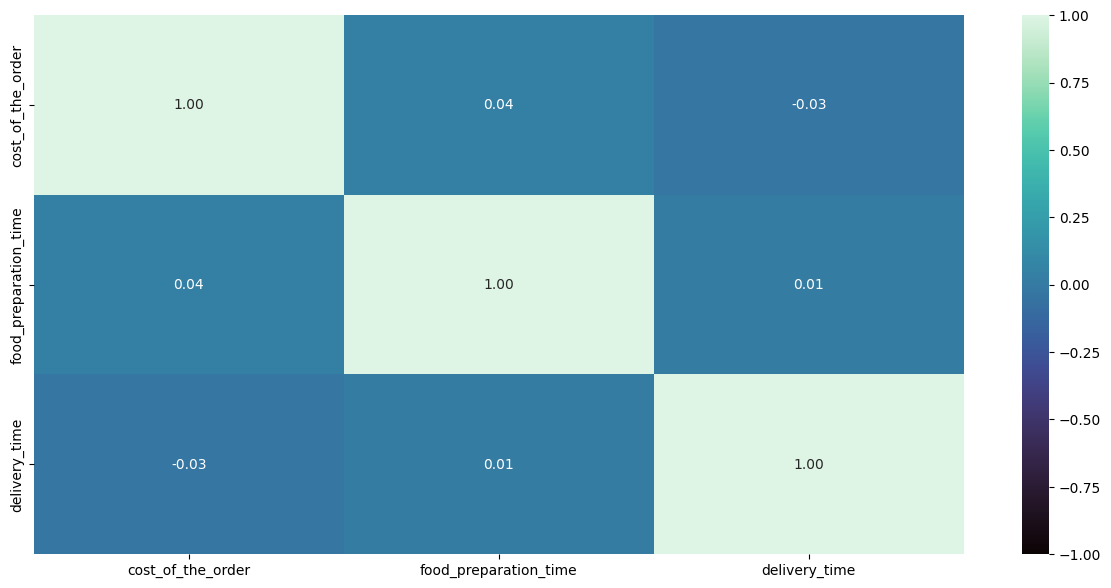

In [204]:
# Heatmap for a lot of variables
col_list = [ 'cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))

sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap= 'mako')

plt.show()

####j) Rating versus Cuisine look at this one

<ipython-input-205-24ceb9aa7aa6>:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.barplot(data=df, x='cuisine_type', y='rating' , color='green', hue= 'rating')


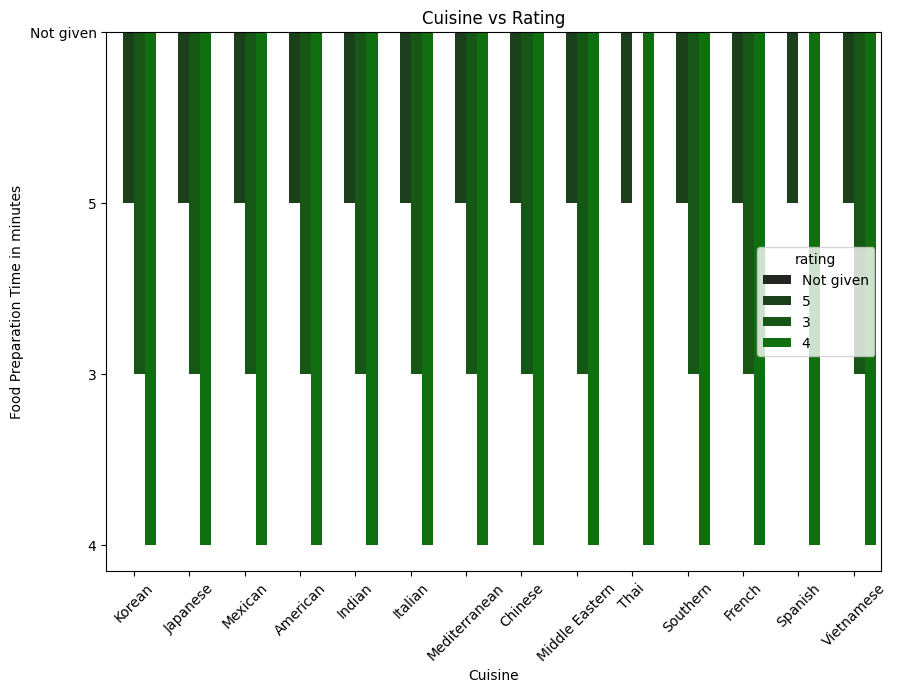

In [205]:
plt.figure(figsize=(10,7)) # makes the plot bigger so that its more readable
plt.title('Cuisine vs Rating')
plt.ylabel('Food Preparation Time in minutes')
plt.xlabel('Cuisine')
plt.xticks(rotation=45)
sns.barplot(data=df, x='cuisine_type', y='rating' , color='green', hue= 'rating')
plt.show()
print('\n')



Observaions:


*  But most cuisines had a healthy variety of ratings.
*  Thai and Spanish cuisines did not have 3 star ratings.

*  For some reason I couldn't get this graph to plot in a more aesthetically pleasing way. So I'll work on that more for future projects.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [206]:
rated_restaurants= df[df['rating'] != 'Not given'].copy()
#print (rated_restaurants) #confirm that it works

rated_restaurants['rating']=rated_restaurants['rating'].astype('int')
#rated_restaurants.info() # confirm now we have the data as an integer

counted_ratings=rated_restaurants.groupby(['restaurant_name'])['rating'].count()
#print(counted_ratings) # prints the amounts of reviews per restaurant


counted_ratings=counted_ratings.sort_values(ascending = False).reset_index()
#print(counted_ratings) # organizes them by amount so we can seee which ones have over 50, and we reset the index to just keeo it organized moving forward.

over_fifty_ratings= counted_ratings[counted_ratings['rating']>50]['restaurant_name']
#print(over_fifty_ratings)

above4=rated_restaurants[rated_restaurants['restaurant_name'].isin(over_fifty_ratings)]
#make a new df referencing the names with the restaurants we found
above4=above4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False)
print(above4)




restaurant_name
The Meatball Shop            4.511905
Blue Ribbon Fried Chicken    4.328125
Shake Shack                  4.278195
Blue Ribbon Sushi            4.219178
Name: rating, dtype: float64


#### Observations:
The restaurants that meet the criteria to get the promotional offer are:


1.   The Meatball Shop
2.   Blue Ribbon Fried Chicken
3.   Shake Shack
4.   Blue Ribbon Sushi




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [207]:
#function to determine the revenue
def revenue_calc(order):
    if order > 20:
        return order*0.25
    elif order > 5:
        return order*0.15
    else:
        return order*0
#Create a new column where the revenue calculator is applied to each record
df['Revenue'] = df['cost_of_the_order'].apply(revenue_calc)

# get the total revenue and print it
total_rev = df['Revenue'].sum()
print('The net revenue generated is $',round(total_rev, 2), 'dollars')

The net revenue generated is $ 6166.3 dollars


#### Observations:
After creating the revenue function we apply it to the 'cost of the order' column and once we do a sum of the column we get a final revenue of $6166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [208]:
# Write the code here

# Create a new column with both times added together.
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
#1. first isolate the orders over 20 dollars
sixty_min_Orders = df[df['total_time']>60]
#2. calculate the percentage of the orders
over60min_Orders = (sixty_min_Orders.shape[0] / df.shape[0]) * 100
#3. print it out.
print('The percentage of the orders have more than 60 minutes in delivery time are:', round(over60min_Orders, 2),'%.')

The percentage of the orders have more than 60 minutes in delivery time are: 10.54 %.


#### Observations:
If the goal of Foodhub is to have all orders delivered under 60 minutes, then only 10.54% of their orders isn't meeting that KPI.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [209]:
#print out the mean delivery times on all days.
#1. weekdays
print('The mean delivery time on weekdays is:',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


#2. weekend
print('The mean delivery time on weekend is:',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')



The mean delivery time on weekdays is: 28 minutes
The mean delivery time on weekend is: 22 minutes


#### Observations:


*   The average delivery time is 6 minutes higher on the weekends than it is on the weekdays. One possibility could be that there is higher workforce traffic on the weekdays.




### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

*   An overwhelming amount (38.8%) of orders are not placing ratings.
*   However it is good to see that the next highest rating is 5 stars.
*   Orders time preparation takes between 20 minutes to 35 minutes which is very reasonable.
*   The heat map didn't give us too much insight since a lot of our data was nominal and not just numerical.
*   The average of the orders placed is $16.49.   

*   The median of the orders placed is $14.14.

*   Given the previous info we can confidently say that most people will be placing orders under $20 when ordering off of Food Hub
*   Surprisingly, the data showed that the ratings weren't affected much by the time it took to receive the delivery, so it seems like if we want to up our ratings, we might need to offer something as an incentive.


### Recommendations:

*   In reference to the promted question about the promotional offer, the following restaurants should get that promo:

1.   The Meatball Shop
2.   Blue Ribbon Fried Chicken
3.   Shake Shack
4.   Blue Ribbon Sushi


*   The top 5 cuisines listed below, this could also be another idea of a category to offer promotions to.
1.  American    
2.  Japanese    
3.  Italian     
4.  Chinese     
5.  Mexican      

* On the weekends Vietnamese food is the most popular so it might be a good idea to coordinate promotions on the weekend for this cuisine.

*   If they'd like a KPI suggestion, it would be to make it a goal to have all orders delivered under an hour.  One suggestion would be to offer a discount to those who pick up their orders, that would drastically reduce an orders "delivery time".

* Since we can can count how many ratings people leave based on username, we could also offer promotions or rewards to those who leave reviews about their experiences with Foodhub or certain restaurants listed on the website.



 Suggestions in regards to FoodHub's Future Data Collection:
* Another suggestion would be to further categorize the data collecting to select the day of the week instead of just weekend or weekday, if we get more specific with our data collection we may be able to glean more about our customers.

* If we can track the dates and delivery zipcodes with the data for lets say a month, we could see if sales dip or increase during a holiday or eventful weekends so we could tailor promotions to that.





---

In [210]:
! pwd

/content


In [212]:
%%shell
jupyter nbconvert --to html ///content/drive/MyDrive/Collab_Notebooks/Python_Foundations/Project1_FoodHub_PythonFoundations/PythonFoundations_Project1_FullCode_VGrimaldo.ipynb

[NbConvertApp] Converting notebook ///content/drive/MyDrive/Collab_Notebooks/Python_Foundations/Project1_FoodHub_PythonFoundations/PythonFoundations_Project1_FullCode_VGrimaldo.ipynb to html
[NbConvertApp] Writing 1771024 bytes to /content/drive/MyDrive/Collab_Notebooks/Python_Foundations/Project1_FoodHub_PythonFoundations/PythonFoundations_Project1_FullCode_VGrimaldo.html
